In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/alexmcgraw/Documents/Adv_Predictive_Modeling/Final_Presentation/Processed data/finaldata_w_xy_and_dummies.csv')
data = data.drop(columns='Unnamed: 0')

In [3]:
from sklearn.model_selection import train_test_split

df = data[['passResult','quarter','down','yardsToGo','Opp_Dist','Team_Dist','QB_Dist','FootDist',\
           'defendersInTheBox','numberOfPassRushers','height','weight','position_CB', 'position_DB', \
           'position_DE', 'position_DT','position_FB', 'position_HB', 'position_K', 'position_QB', \
           'position_RB', 'position_TE', 'position_WR', 'route_ANGLE','route_CORNER', 'route_CROSS', \
           'route_FLAT', 'route_GO', 'route_HITCH', 'route_IN', 'route_OUT', 'route_POST', \
           'route_SCREEN', 'route_SLANT','route_WHEEL',]]

# format heigh to number in inches
height_dict = {'5-10':70,'6-5':77, '6-4':76, '6-3':75, '6-2':74, '6-1':73, '6-0':72, '5-11':71, \
               '5-9':69, '5-8':68, '5-7':67, '5-6':66,'6-7':79,'6-6':78,'64':64,'65':65,'66':66,'67':67,'68':68, \
              '69':69,'70':70,'71':71,'72':72,'73':73,'74':74,'75':75,'76':76,'77':77,'78':78,'79':79,'80':80}
df['height'] = data['height'].map(height_dict) 

/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
len(df)

17639

In [4]:
X = df.drop(['passResult'], axis=1)
y = df['passResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.columns

Index(['quarter', 'down', 'yardsToGo', 'Opp_Dist', 'Team_Dist', 'QB_Dist',
       'FootDist', 'defendersInTheBox', 'numberOfPassRushers', 'height',
       'weight', 'position_CB', 'position_DB', 'position_DE', 'position_DT',
       'position_FB', 'position_HB', 'position_K', 'position_QB',
       'position_RB', 'position_TE', 'position_WR', 'route_ANGLE',
       'route_CORNER', 'route_CROSS', 'route_FLAT', 'route_GO', 'route_HITCH',
       'route_IN', 'route_OUT', 'route_POST', 'route_SCREEN', 'route_SLANT',
       'route_WHEEL'],
      dtype='object')

In [5]:
falses = X_train[(X_train['QB_Dist'].isnull() == True) | (X_train['defendersInTheBox'].isnull() == True)]
false_test = X_test[(X_test['QB_Dist'].isnull() == True) | (X_test['defendersInTheBox'].isnull() == True)]


In [6]:
idx = falses.index
idx_test = false_test.index

In [7]:
X_train.dropna(subset=['QB_Dist', 'defendersInTheBox'], inplace=True)
X_test.dropna(subset=['QB_Dist', 'defendersInTheBox'], inplace=True)
y_train.drop(index=idx, inplace=True)
y_test.drop(index=idx_test, inplace=True)



/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alexmcgraw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
len(X_train) + len(X_test)

17624

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_roc_curve, f1_score
from matplotlib import pyplot as plt

reg = MLPClassifier(shuffle=True, max_iter=500, early_stopping=True).fit(X_train, y_train)

pred = reg.predict(X_test)
probabs = reg.predict_proba(X_test)[:,1]

print(1 - accuracy_score(y_test, pred), roc_auc_score(y_test, probabs), f1_score(y_test, pred))

0.27466545701973233 0.7333088870560226 0.8061469505362573


In [9]:
confusion_matrix(y_test, pred)

array([[ 680, 1010],
       [ 201, 2518]])

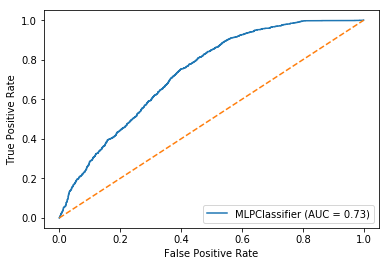

In [10]:
plot_roc_curve(reg, X_test, y_test)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

In [92]:
data.head(10)

,gameId,playId,x,y,nflId,event,displayName,frameId,targetNflId,Opp_Dist,...,route_FLAT,route_GO,route_HITCH,route_IN,route_OUT,route_POST,route_SCREEN,route_SLANT,route_WHEEL,route_undefined
0,2018090600,75,91.36,44.14,2495454.0,ball_snap,Julio Jones,11,2495454.0,7.472858,...,0,0,1,0,0,0,0,0,0,0
1,2018090600,190,50.39,21.58,2495454.0,ball_snap,Julio Jones,11,2495454.0,4.070344,...,0,0,0,0,0,0,0,0,0,0
2,2018090600,889,91.37,8.43,2495454.0,ball_snap,Julio Jones,11,2495454.0,3.571792,...,0,0,0,0,0,1,0,0,0,0
3,2018090600,1423,36.21,38.61,2495454.0,ball_snap,Julio Jones,11,2495454.0,6.582439,...,0,0,0,0,1,0,0,0,0,0
4,2018090600,1869,19.85,17.77,2495454.0,ball_snap,Julio Jones,11,2495454.0,3.500700,...,0,0,0,0,1,0,0,0,0,0
5,2018090600,1940,39.53,45.89,2495454.0,ball_snap,Julio Jones,11,2495454.0,8.721382,...,0,0,0,1,0,0,0,0,0,0
6,2018090600,2450,36.96,45.05,2495454.0,ball_snap,Julio Jones,11,2495454.0,4.060209,...,0,0,1,0,0,0,0,0,0,0
7,2018090600,2474,40.64,11.27,2495454.0,ball_snap,Julio Jones,11,2495454.0,7.595183,...,0,1,0,0,0,0,0,0,0,0
8,2018090600,2575,28.63,42.06,2495454.0,ball_snap,Julio Jones,11,2495454.0,16.501376,...,0,0,0,0,0,0,0,0,0,0
9,2018090600,3004,48.52,37.90,2495454.0,ball_snap,Julio Jones,11,2495454.0,5.155938,...,0,0,0,0,1,0,0,0,0,0
